In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt

import time
import json
import sys
sys.path.append("../../")

from src.context_aware.config import ModelConfig, DatasetConfig
from src.dataset_manager import DatasetConvertor 
from src.context_aware.preprocessing import PreparingDataset
from src.context_aware.models import createModel
from src.context_aware.training import createDataLoaders
from src.context_aware.evaluation import evaluateModel


In [2]:
rawDatasetFolder = "../../data/raw"
model_folder = "../../data/models/context_aware"
configPath = "../config/conbined_flows.json"

direction = "forward"
lenWindow = 20
verbose = True

In [3]:
config = json.load(open(configPath, "r"))
mapping = config.get("DIRECTION_MAPPING", {})
dpdr_params = config.get("dpdr_params", {})

datasetConverter = DatasetConvertor(rawDatasetFolder, config)
datasetConverter.processDataset(direction=direction, **dpdr_params[direction])
dataUnit = datasetConverter.getDataUnit(f"combined_{mapping[direction]}")

datasetConfig = DatasetConfig.initialize(len_window=lenWindow, data_augment=False)
_, testData = PreparingDataset(dataUnit, datasetConfig, verbose=False)

modelConfig = ModelConfig.from_dataset(datasetConfig, testData)
model, device = createModel(modelConfig)
model.load_checkpoint(f"{model_folder}/direction_{direction}_lenWindow_{lenWindow}.pth")

========== Combined ============
Forward: Compression rate: 0.2328


(1560, 20, 12)
(1560, 20, 12)
(1560, 1)
(1560, 1, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (1, 12) (20, 12)
(20, 12) (

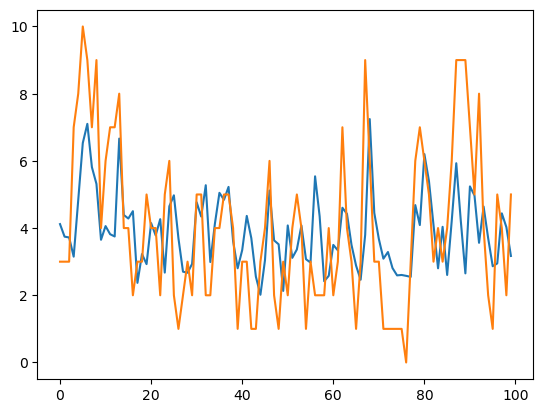

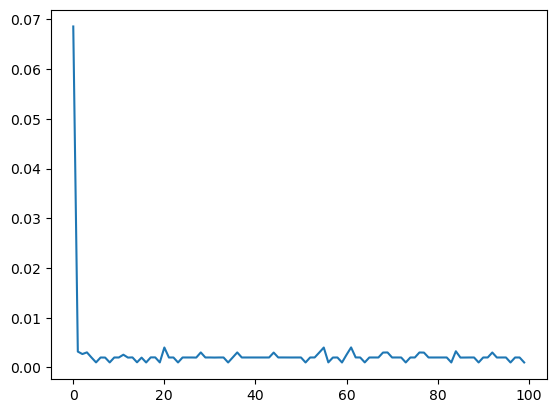

In [4]:
sources, _, last_trans_sources, _, traffic, _, _, sourcesNoSmooth = testData
print(sources.shape)
print(sourcesNoSmooth.shape)
print(traffic.shape)
print(last_trans_sources.shape)

output_list = []
inference_time_list = []

num_samples = sources.shape[0]
for i in range(100):
    start_time = time.time()
    print(sources[i].shape, last_trans_sources[i].shape, sourcesNoSmooth[i].shape)
    output = model.inference(sources[i], last_trans_sources[i], sourcesNoSmooth[i])
    end_time = time.time()
    inference_time = end_time - start_time

    output_list.append(output)
    inference_time_list.append(inference_time)
print("Avg. inference time: ", np.mean(inference_time_list))
plt.plot(output_list)
plt.plot(traffic[0:len(output_list)])
plt.show()
plt.plot(inference_time_list)
plt.show()

